<a href="https://colab.research.google.com/github/WilkisterMbaka/KNN-and-Naive-Bayes-Classifier/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2022_06_Wilkister_Mbaka_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spambase Dataset**

## **1.0 Defining The Question**

**a) Specifying the Question**

Build a Naive Bayes Model that determines whether an email is spam or not

**b) Defining the Metric for Success**

Metric of succes is building a bayesian model.

**c) Understanding the context**

Email spam, also known as junk email, refers to unsolicited email messages, usually sent in bulk to a large list of recipients. Spam can be sent by real humans, but more often, it is sent by a botnet, which is a network of computers (bots or spambots) infected with malware and controlled by a single attacking party (bot herder).

**d) Recording the Experimental Design**

The experimental design for this project is as follows:

* Loading the libraries and dataset
* Data cleaning and preparation
* Performing the Univariate analysis
* Performing the Bivariate analysis
* Performing the Multivariate analysis
* Applying the Bayesian models - Gaussian, Multinomial and Bernoulli
* Applying the GridSearch CV to test through different parameters
* Making predictions using the different models that I've created
* Assesing the accuracy of the models created
* Making conclusions and challenging the solution

## **2.0 Reading Data**

In [2]:
#importing Libraries

#importing pandas
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib
#
import matplotlib.pyplot as plt
# %matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the Data from the source i.e. csv
#
df = pd.read_csv('/content/spambase.data', names=( 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'))

## **3.0 Checking the Data**

**Train Dataset**

In [4]:
# Check top 5 records
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
# Check bottom 5 records
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [6]:
# Determining the no. of records in our dataset
#
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

Number of rows: 4601 
Number of columns: 58


In [7]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [8]:
#Checking how many unique value are in a column
df.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

In [11]:
# Check for unique values in each column
# for col in df.columns:
#   print(f'{col} column unique values: \n')
#   print(df[col].unique(), end='\n')
#   print('**********')
#   print('\n')

## **4.0 Tidying the Dataset**

In [10]:
# Check for missing values in the dataset
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [12]:
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


In [13]:
# Drop duplicates in ranking dataset
df.drop_duplicates(inplace=True)

# Check for duplicates
df.duplicated().sum()

0

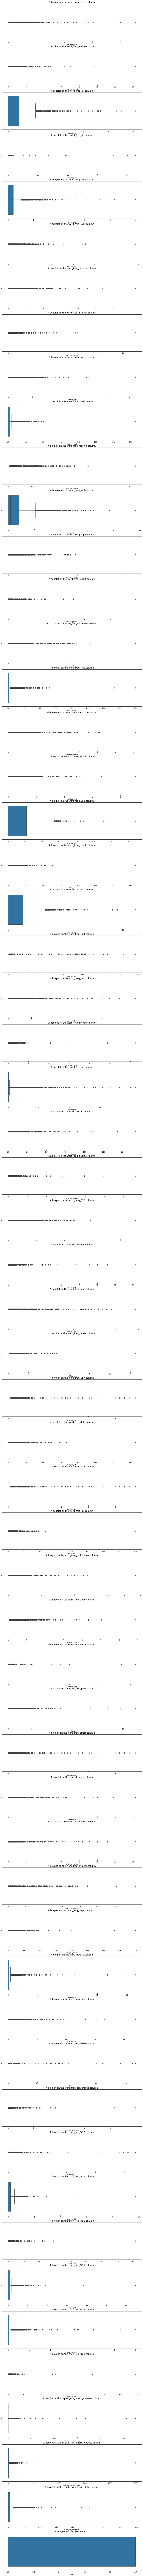

In [19]:
# Checking for Outliers
# col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
#        'word_freq_our', 'word_freq_over', 'word_freq_remove',
#        'word_freq_internet', 'word_freq_order', 'word_freq_mail',
#        'word_freq_receive', 'word_freq_will', 'word_freq_people',
#        'word_freq_report', 'word_freq_addresses', 'word_freq_free',
#        'word_freq_business', 'word_freq_email', 'word_freq_you',
#        'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
#        'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
#        'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
#        'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
#        'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
#        'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
#        'word_freq_original', 'word_freq_project', 'word_freq_re',
#        'word_freq_edu', 'word_freq_table', 'word_freq_conference',
#        'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
#        'char_freq_$', 'char_freq_#', 'capital_run_length_average',
#        'capital_run_length_longest', 'capital_run_length_total', 'class']
fig, ax = plt.subplots(len(df.columns), figsize = (16,300))
for i, col_val in enumerate(df.columns):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()


In [16]:
# Counting outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


word_freq_make                 982
word_freq_address              811
word_freq_all                  293
word_freq_3d                    46
word_freq_our                  449
word_freq_over                 933
word_freq_remove               762
word_freq_internet             767
word_freq_order                722
word_freq_mail                 748
word_freq_receive              651
word_freq_will                 250
word_freq_people               806
word_freq_report               336
word_freq_addresses            305
word_freq_free                 830
word_freq_business             906
word_freq_email                972
word_freq_you                   58
word_freq_credit               389
word_freq_your                 193
word_freq_font                 112
word_freq_000                  619
word_freq_money                659
word_freq_hp                  1012
word_freq_hpl                  789
word_freq_george               667
word_freq_650                  452
word_freq_lab       

There seems to be very many outliers, if we decide to drop them, the data may not be sufficient for the analysis

## **5.0 Exploratory Data Analysis**

### **5.1 Univariate Analysis**

In [20]:
num_attributes = df.select_dtypes( include=['int64', 'float64'] )

In [22]:
# Getting the univariate describe summary

desc =num_attributes.describe()
desc1 = desc.T
desc1
#a single index
# table = pd.pivot_table(data=desc,index=['Sex'])
# table


,count,mean,std,min,25%,50%,75%,max
word_freq_make,4210.0,0.104366,0.300005,0.0,0.0000,0.000,0.00000,4.540
word_freq_address,4210.0,0.112656,0.454260,0.0,0.0000,0.000,0.00000,14.280
word_freq_all,4210.0,0.291473,0.515719,0.0,0.0000,0.000,0.44000,5.100
word_freq_3d,4210.0,0.063078,1.352487,0.0,0.0000,0.000,0.00000,42.810
word_freq_our,4210.0,0.325321,0.687805,0.0,0.0000,0.000,0.41000,10.000
word_freq_over,4210.0,0.096656,0.276030,0.0,0.0000,0.000,0.00000,5.880
word_freq_remove,4210.0,0.117475,0.397284,0.0,0.0000,0.000,0.00000,7.270
word_freq_internet,4210.0,0.108000,0.410282,0.0,0.0000,0.000,0.00000,11.110
word_freq_order,4210.0,0.091860,0.282144,0.0,0.0000,0.000,0.00000,5.260
word_freq_mail,4210.0,0.248420,0.656638,0.0,0.0000,0.000,0.19000,18.180


In [23]:
# Dispersion - std, var, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.var ) ).T
d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d1, d4, d5] ).T.reset_index()
m.columns = ( ['columns', 'variance', 'range', 'std', 'skew', 'kurtosis'])
m

,columns,variance,range,std,skew,kurtosis
0,word_freq_make,0.089982,4.540,0.299969,5.869855,54.351406
1,word_freq_address,0.206303,14.280,0.454206,13.464664,306.685973
2,word_freq_all,0.265902,5.100,0.515657,2.980623,12.941447
3,word_freq_3d,1.828786,42.810,1.352326,27.209539,788.370058
4,word_freq_our,0.472964,10.000,0.687724,4.696946,37.064801
5,word_freq_over,0.076175,5.880,0.275997,6.122653,71.603267
6,word_freq_remove,0.157797,7.270,0.397236,6.808707,76.381647
7,word_freq_internet,0.168292,11.110,0.410234,9.734232,167.550219
8,word_freq_order,0.079586,5.260,0.282110,5.284306,48.011373
9,word_freq_mail,0.431072,18.180,0.656560,8.568579,162.539033


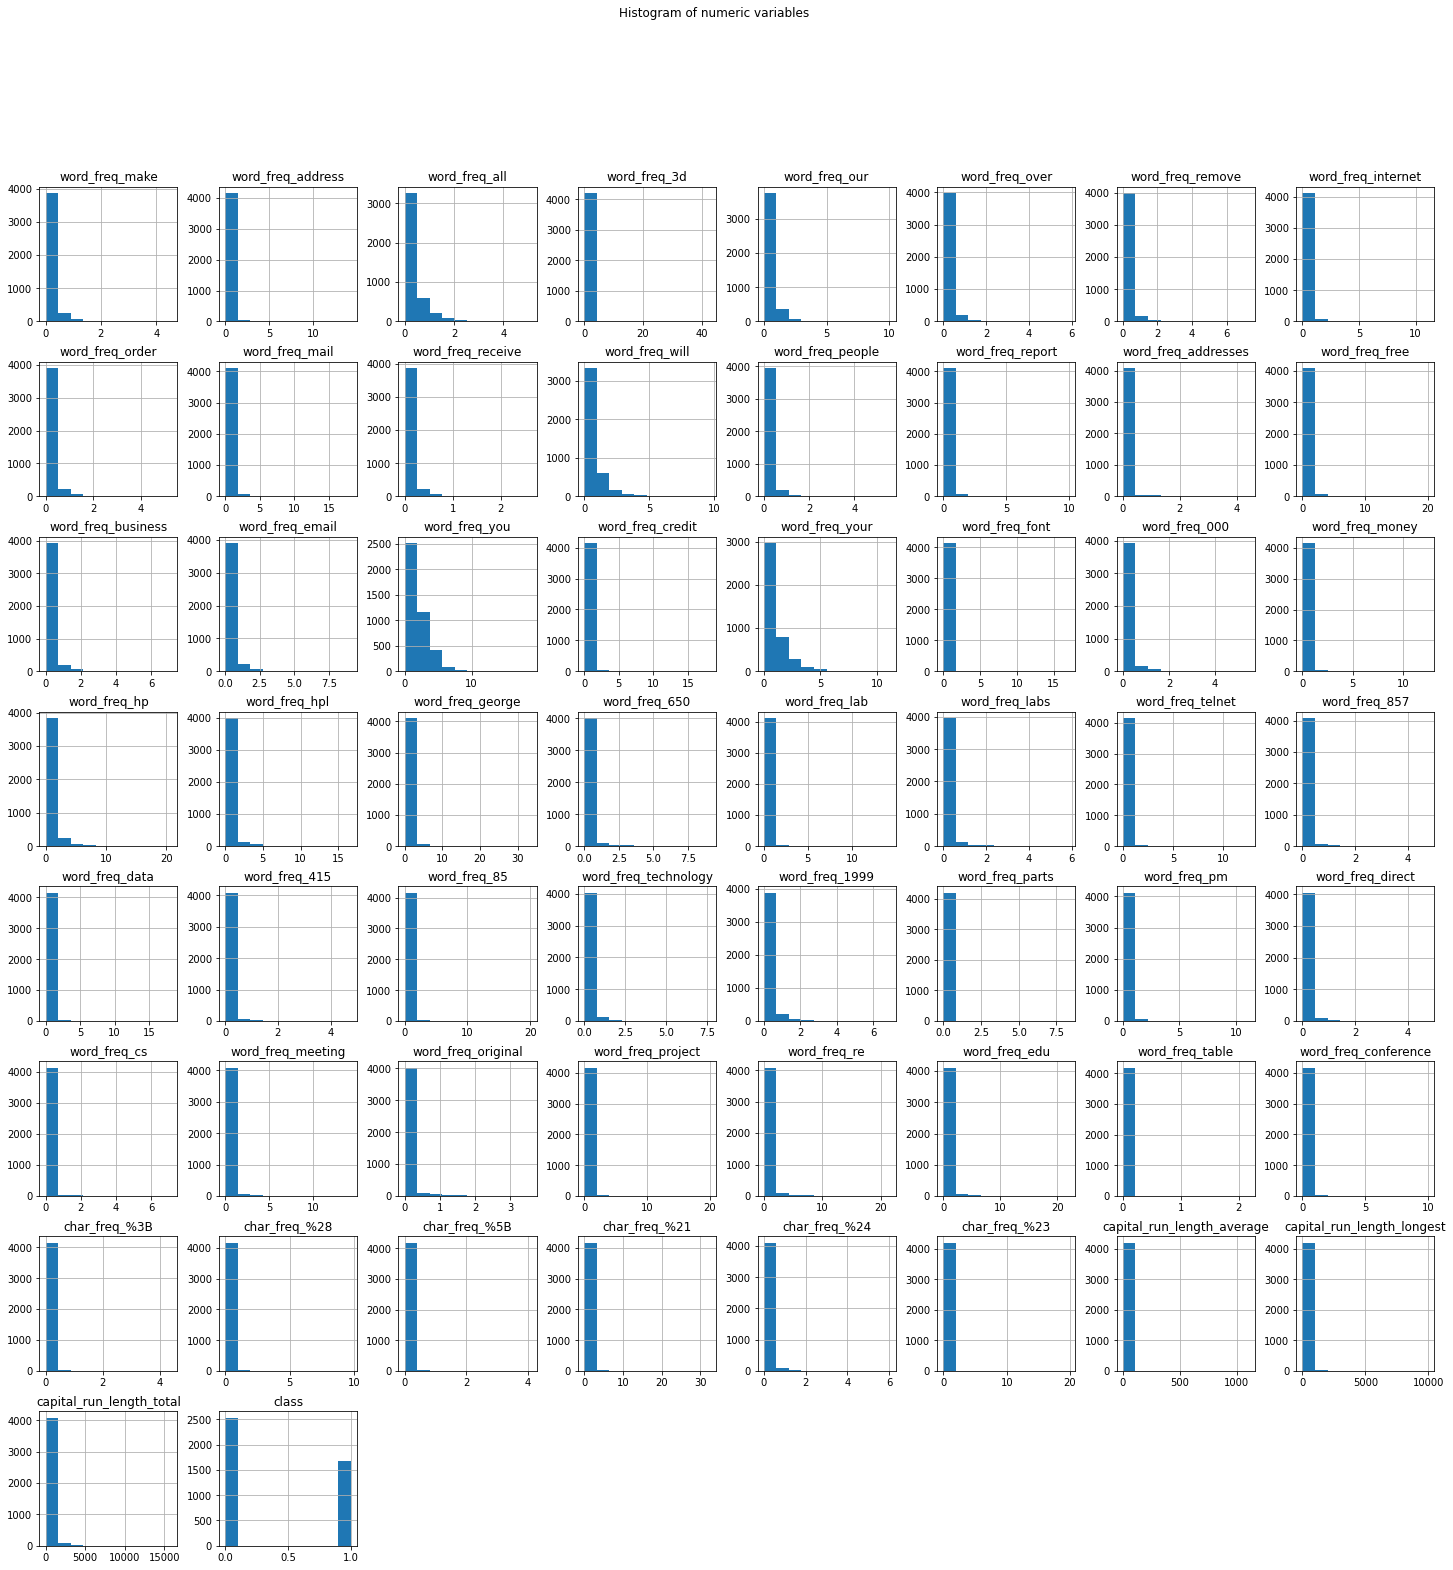

In [26]:
# Plotting the numerical variables on histogram to view their distributions.

df.hist(bins=10, figsize=(25,25))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Word Histogram')
plt.show()

In [ ]:
sns.countplot(df['class'], color='green',saturation=0.5)
plt.xlabel('spam / not_spam')
plt.ylabel('Count')

### **5.2 Bivariate Analysis**

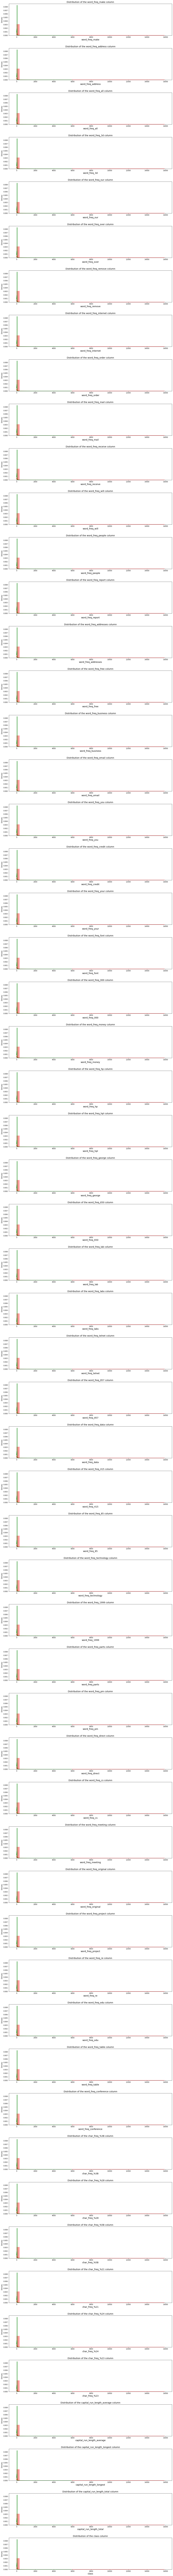

In [28]:
# Plotting distplot to show distribution of spam as compared to all columns

fig, ax = plt.subplots(len(df.columns), figsize = (16, 230))
for i, col_val in enumerate(df.columns):
    spam = df.loc[df['class']==1]    # Selecting only spam messages
    notspam = df.loc[df['class']==0]  # Selecting only non spam messages
    sns.distplot(spam, color ='red', label = 'spam message', ax=ax[i])
    sns.distplot(notspam, color ='green', label = 'not spam', ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

In [29]:
#Creating a dataframe for the correlations in our dataset.
correlations = df.corr()
correlations

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,...,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,...,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,...,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,...,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,...,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,...,-0.021744,-0.011584,-0.016729,0.058121,0.105927,0.020413,-0.013554,0.065709,0.063403,0.212311
word_freq_remove,0.011061,0.077374,0.028581,0.014289,0.135957,0.046868,1.000000,0.033692,0.049238,0.055695,...,-0.034080,-0.061318,-0.029466,0.050992,0.067236,0.049306,0.039174,0.050825,-0.017081,0.334456
word_freq_internet,-0.004370,0.013706,0.007221,0.003801,0.023411,0.079704,0.033692,1.000000,0.106890,0.079045,...,-0.028976,-0.042751,-0.021383,0.029031,0.053569,-0.008121,0.009977,0.035603,0.036895,0.200666
word_freq_order,0.103842,0.053426,0.077561,-0.001040,0.014483,0.097037,0.049238,0.106890,1.000000,0.123366,...,-0.015004,-0.037377,0.017321,0.035937,0.152457,-0.002075,0.110788,0.166299,0.233198,0.221454
word_freq_mail,0.040829,0.184304,0.025138,-0.003845,0.027233,0.010099,0.055695,0.079045,0.123366,1.000000,...,0.006772,-0.004960,0.003800,0.031602,0.077405,0.034482,0.073128,0.101546,0.078587,0.131686


In [30]:
# Pair plot analysis for the whole dataframe
sns.pairplot(df, diag_kind='kde',hue='class', corner=True)
sns.set_style('white')
plt.show()

KeyError: ignored

Error in callback <function flush_figures at 0x7f78ccaeb290> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# Check correlation of all columns
plt.figure(figsize=(70,70))

sns.heatmap(df.corr(), square=True,annot=True)

plt.title('Correlation between All Features')

As the classes increase that is (1-3) the fare also increases thus having the negative correlation of -0.55. This means there is a relation between fare and pclass. There is also a slight correlation between fare and family size of 0.22. There is also a slight correlation between fare and one's survival of 0.26. There is also a slight correlation of age and pclass. Meaning the aged individuals were better economically thus boarding on the first class. There is also a correlation between one's survival and pclass. Meaning th well economic individuals were given priority.



## **6.0 Naive Bayes**

In [31]:
# Create a copy of the original dataset
df_copy = df.copy()

**Baseline Model - 80/20 split**

In [36]:
# Loading the libraries 
#

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [34]:
# split the data into labels and features

X = df.iloc[ :, :-1].values
y = df['class'].values

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify=df['class'])

# Modelling for training and predictions

clf = MultinomialNB()  
clf = clf.fit(X_train, y_train) 

# predicting using the model built

y_pred = clf.predict(X_test)

In [37]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7838479809976246
[[431  75]
 [107 229]]

 Classification report
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       506
           1       0.75      0.68      0.72       336

    accuracy                           0.78       842
   macro avg       0.78      0.77      0.77       842
weighted avg       0.78      0.78      0.78       842



In [38]:
print(X_train.shape)
print(X_test.shape)

(3368, 57)
(842, 57)


The 80-20 set has an accuracy score 78.4% . 

**Baseline Model - 70/30 split**

In [39]:
# split the data into labels and features

X = df.iloc[ :, :-1].values
y = df['class'].values

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0, stratify=df['class'])

# Modelling for training and predictions

clf = MultinomialNB()  
clf = clf.fit(X_train, y_train) 

# predicting using the model built

y_pred = clf.predict(X_test)

In [40]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7862232779097387
[[646 113]
 [157 347]]

 Classification report
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       759
           1       0.75      0.69      0.72       504

    accuracy                           0.79      1263
   macro avg       0.78      0.77      0.77      1263
weighted avg       0.78      0.79      0.78      1263



In [41]:
print(X_train.shape)
print(X_test.shape)

(2947, 57)
(1263, 57)


The 70-30 set has an accuracy score 78.62%

**Baseline Model - 60/40 split**

In [42]:
# split the data into labels and features

X = df.iloc[ :, :-1].values
y = df['class'].values

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0, stratify=df['class'])

# Modelling for training and predictions

clf = MultinomialNB()  
clf = clf.fit(X_train, y_train) 

# predicting using the model built

y_pred = clf.predict(X_test)

In [43]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.8105700712589073
[[857 155]
 [164 508]]

 Classification report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1012
           1       0.77      0.76      0.76       672

    accuracy                           0.81      1684
   macro avg       0.80      0.80      0.80      1684
weighted avg       0.81      0.81      0.81      1684



In [44]:
print(X_train.shape)
print(X_test.shape)

(2526, 57)
(1684, 57)


The 60-40 set has an accuracy score 81.1%

The accuracy seems to go down every time we decrease the test size. This is because their are fewer points for the KNN algorithm to map in it's space. So it is harder to define points as survived or not. However with more points it also reduces variance. So having more points may not help too much, and having a good balance between bias and variance. May be the best for a KNN model.

## **7.0 Challenging the Solution**

**Hyperparameter Tuning**

To our best performing model

In [45]:
# split the data into labels and features

X = df.iloc[ :, :-1].values
y = df['class'].values

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0, stratify=df['class'])

In [48]:
from sklearn.model_selection import GridSearchCV

# Defining the hyper parameters for the Knearest Neighbors Classifier
alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

classifier = MultinomialNB()

clf = GridSearchCV(classifier, hyperparameters,cv=20)
clf = clf.fit(X_train, y_train)


print('\n')

print(clf.best_params_)
print('\n')

#Creating a better model based on the parameters given to us by the greadsearch
modelone = MultinomialNB(alpha = clf.best_params_['alpha'], class_prior = clf.best_params_['class_prior'], fit_prior = clf.best_params_['fit_prior']).fit(X_train, y_train)
modelone

# predicting using the model built

y_pred = modelone.predict(X_test)

# Evaluating the Algorithm
# ---
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))



{'alpha': 0, 'class_prior': None, 'fit_prior': True}


The accuracy of the model is  0.8111638954869359

 Confusion matrix
[[858 154]
 [164 508]]

 Classification report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1012
           1       0.77      0.76      0.76       672

    accuracy                           0.81      1684
   macro avg       0.80      0.80      0.80      1684
weighted avg       0.81      0.81      0.81      1684



**Conclusion**
Conclusion
In conclusion I believe that the company can use this model. To prdict whether a passenger will survive or not, on a boat. Also I believe they can use the exploratory data analysis. To understand what kind of factors ship crew think about when saving individuals from a boat. They can also use this to advise crew members on how to save individuals on a boat.

Recommendation
I recommend that the boat company uses the last model optimization technique. To ensure that they get accurate results from their predictions. This will allow them to be able to predict survival rates on everyday cruises. With much accuracy.

**Follow up questions**

**a). Did we have the right data?**

Yes, I believe we had the right data for analysis and modeling

**b). Do we need other data to answer our question?**

no the data is enough to make our predictions

**c). Did we have the right question?**

Yes, the question was right.